In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Some Exploratory Analysis

In [ ]:
objects = pd.read_csv("/content/drive/MyDrive/Startup investments/objects.csv")
objects.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401,54,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186,85,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107,34,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,0,0,NaN,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,0,0,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200,74,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18


In [ ]:
objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462651 entries, 0 to 462650
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   462651 non-null  object 
 1   entity_type          462651 non-null  object 
 2   entity_id            462651 non-null  int64  
 3   parent_id            27715 non-null   object 
 4   name                 462649 non-null  object 
 5   normalized_name      462620 non-null  object 
 6   permalink            462651 non-null  object 
 7   category_code        123186 non-null  object 
 8   status               462651 non-null  object 
 9   founded_at           100441 non-null  object 
 10  closed_at            2809 non-null    object 
 11  domain               174942 non-null  object 
 12  homepage_url         174942 non-null  object 
 13  twitter_username     126089 non-null  object 
 14  logo_url             208850 non-null  object 
 15  logo_width       

In [ ]:
objects.drop(["created_at","updated_at", "logo_url", "logo_width","overview", "entity_id","parent_id","normalized_name", "logo_height","short_description", "created_at", "updated_at", "twitter_username","relationships", "domain", "homepage_url", "overview", "tag_list","city", "region", "state_code"], axis="columns", inplace=True)
objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462651 entries, 0 to 462650
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   462651 non-null  object 
 1   entity_type          462651 non-null  object 
 2   name                 462649 non-null  object 
 3   permalink            462651 non-null  object 
 4   category_code        123186 non-null  object 
 5   status               462651 non-null  object 
 6   founded_at           100441 non-null  object 
 7   closed_at            2809 non-null    object 
 8   description          95005 non-null   object 
 9   country_code         95043 non-null   object 
 10  first_investment_at  16956 non-null   object 
 11  last_investment_at   16956 non-null   object 
 12  investment_rounds    462651 non-null  int64  
 13  invested_companies   462651 non-null  int64  
 14  first_funding_at     31507 non-null   object 
 15  last_funding_at  

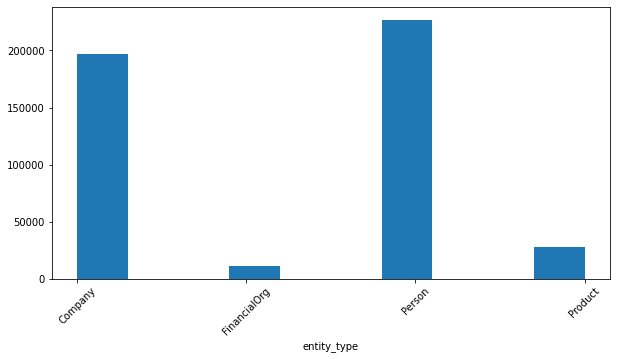

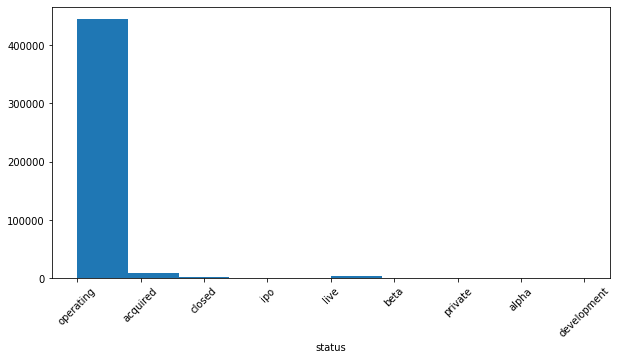

In [ ]:

for col in ['entity_type', 'status']:
  if(len(pd.unique(objects[col]))>20):
    plt.figure(figsize=(20,8))
    plt.hist(objects[col], bins=len(pd.unique(objects[col])))
    plt.xticks(rotation=90)
  else :
    plt.figure(figsize=(10,5))
    plt.hist(objects[col])
    plt.xticks(rotation=45)
    
  plt.xlabel(col)
  plt.show() 

In [ ]:
investments = pd.read_csv("/content/drive/MyDrive/Startup investments/investments.csv")
investments.head()

,id,funding_round_id,funded_object_id,investor_object_id,created_at,updated_at
0,1,1,c:4,f:1,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,1,c:4,f:2,2007-07-04 04:52:57,2008-02-27 23:14:29
2,3,3,c:5,f:4,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,f:1,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,4,c:5,f:5,2007-05-27 06:09:36,2013-06-28 20:07:24


In [ ]:
objects.rename(columns={'id':'funded_object_id'}, inplace=True)
df = investments.merge(objects, on='funded_object_id')
df.head()

,id,funding_round_id,funded_object_id,investor_object_id,created_at,updated_at,entity_type,name,permalink,category_code,status,founded_at,closed_at,description,country_code,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,created_by
0,1,1,c:4,f:1,2007-07-04 04:52:57,2008-02-27 23:14:29,Company,Digg,/company/digg,news,acquired,2004-10-11,NaN,user driven social content website,USA,NaN,NaN,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
1,2,1,c:4,f:2,2007-07-04 04:52:57,2008-02-27 23:14:29,Company,Digg,/company/digg,news,acquired,2004-10-11,NaN,user driven social content website,USA,NaN,NaN,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
2,144,85,c:4,f:1,2007-07-04 04:56:09,2008-02-27 23:14:29,Company,Digg,/company/digg,news,acquired,2004-10-11,NaN,user driven social content website,USA,NaN,NaN,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
3,145,85,c:4,f:2,2007-07-04 04:56:09,2008-02-27 23:14:29,Company,Digg,/company/digg,news,acquired,2004-10-11,NaN,user driven social content website,USA,NaN,NaN,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
4,146,85,c:4,f:4850,2007-07-04 04:56:09,2008-02-27 23:14:29,Company,Digg,/company/digg,news,acquired,2004-10-11,NaN,user driven social content website,USA,NaN,NaN,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80570 entries, 0 to 80569
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   80570 non-null  int64  
 1   funding_round_id     80570 non-null  int64  
 2   funded_object_id     80570 non-null  object 
 3   investor_object_id   80570 non-null  object 
 4   created_at           80570 non-null  object 
 5   updated_at           80570 non-null  object 
 6   entity_type          80570 non-null  object 
 7   name                 80570 non-null  object 
 8   permalink            80570 non-null  object 
 9   category_code        78704 non-null  object 
 10  status               80570 non-null  object 
 11  founded_at           68590 non-null  object 
 12  closed_at            4014 non-null   object 
 13  description          58321 non-null  object 
 14  country_code         77875 non-null  object 
 15  first_investment_at  921 non-null   

In [ ]:
for col in df.columns.values:
  list_vals = pd.unique(df[col])
  print(col + ', has ' + str(len(list_vals)) + ' unique values')
  if len(list_vals) < 10:
    list_str = ''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print('  These are: '+list_str[0:len(list_str)-2])
  print('\n')

id, has 80570 unique values


funding_round_id, has 33028 unique values


funded_object_id, has 21485 unique values


investor_object_id, has 17109 unique values


created_at, has 32507 unique values


updated_at, has 28518 unique values


entity_type, has 1 unique values
  These are: Company


name, has 21485 unique values


permalink, has 21485 unique values


category_code, has 43 unique values


status, has 4 unique values
  These are: acquired, ipo, operating, closed


founded_at, has 1867 unique values


closed_at, has 636 unique values


description, has 13025 unique values


country_code, has 101 unique values


first_investment_at, has 174 unique values


last_investment_at, has 173 unique values


investment_rounds, has 25 unique values


invested_companies, has 23 unique values


first_funding_at, has 3051 unique values


last_funding_at, has 2831 unique values


funding_rounds, has 14 unique values


funding_total_usd, has 6631 unique values


first_milestone_at, has 1923 u

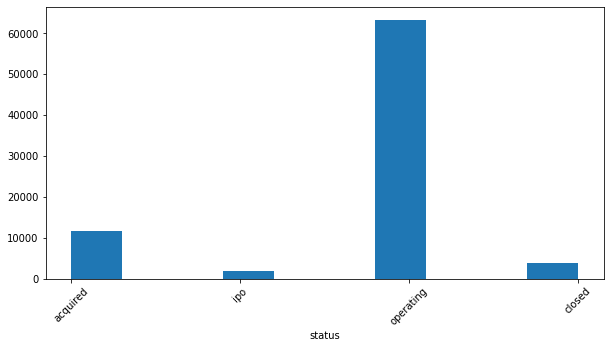

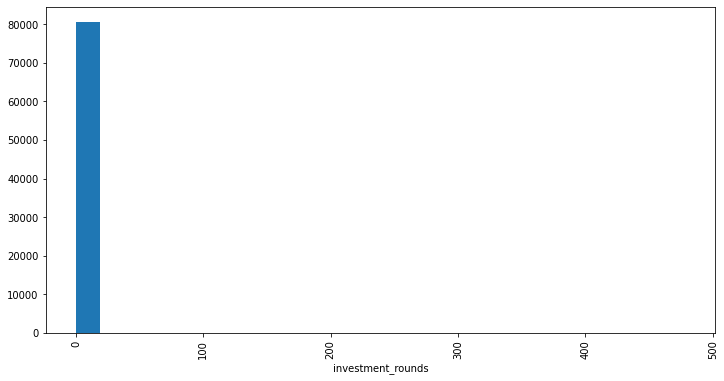

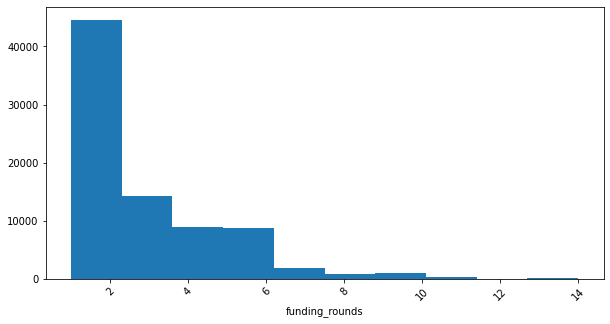

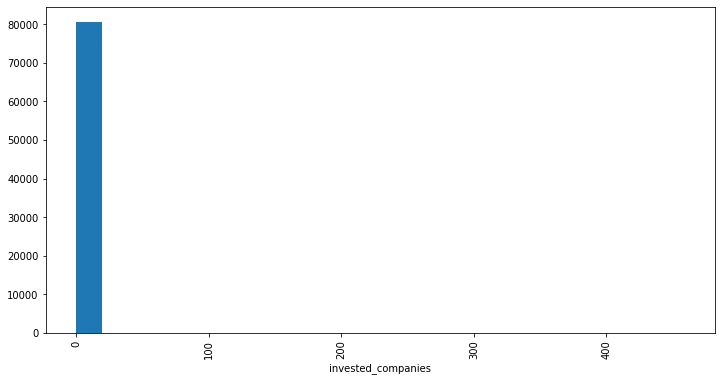

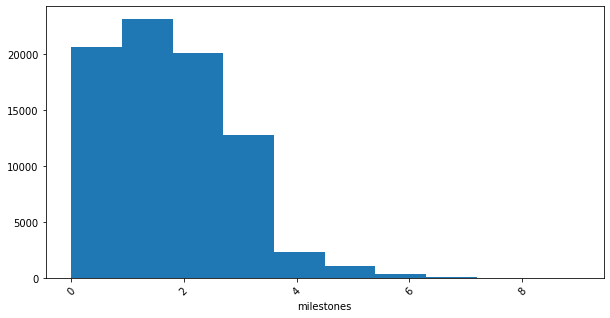

In [ ]:
for col in ['status', 'investment_rounds', 'funding_rounds', 'invested_companies', 'milestones']:
  if(len(pd.unique(df[col]))>20):
    plt.figure(figsize=(12,6))
    plt.hist(df[col], bins=len(pd.unique(df[col])))
    plt.xticks(rotation=90)
  else :
    plt.figure(figsize=(10,5))
    plt.hist(df[col])
    plt.xticks(rotation=45)
    
  plt.xlabel(col)
  plt.show() 

In [ ]:
df.drop(["closed_at", "first_investment_at","invested_companies", "investment_rounds", "created_at", "updated_at"], axis="columns", inplace= True)
df.head()

,id,funding_round_id,funded_object_id,investor_object_id,entity_type,name,permalink,category_code,status,founded_at,description,country_code,last_investment_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,created_by
0,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,NaN,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
1,2,1,c:4,f:2,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,NaN,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
2,144,85,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,NaN,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
3,145,85,c:4,f:2,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,NaN,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
4,146,85,c:4,f:4850,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,NaN,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer


In [ ]:
fr = pd.read_csv("/content/drive/MyDrive/Startup investments/funding_rounds.csv")
fr.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,pre_money_valuation,pre_money_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,0.0,USD,0.0,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,115000000.0,USD,0.0,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,525000000.0,USD,0.0,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


In [ ]:
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        52928 non-null  int64  
 1   funding_round_id          52928 non-null  int64  
 2   object_id                 52928 non-null  object 
 3   funded_at                 52680 non-null  object 
 4   funding_round_type        52928 non-null  object 
 5   funding_round_code        52928 non-null  object 
 6   raised_amount_usd         52928 non-null  float64
 7   raised_amount             52928 non-null  float64
 8   raised_currency_code      49862 non-null  object 
 9   pre_money_valuation_usd   52928 non-null  float64
 10  pre_money_valuation       52928 non-null  float64
 11  pre_money_currency_code   26883 non-null  object 
 12  post_money_valuation_usd  52928 non-null  float64
 13  post_money_valuation      52928 non-null  float64
 14  post_m

In [ ]:
A = fr[['object_id','funded_at', 'funding_round_type', 'raised_amount_usd']]
A.rename(columns={'object_id':'funded_object_id'}, inplace=True)
A.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,funded_object_id,funded_at,funding_round_type,raised_amount_usd
0,c:4,2006-12-01,series-b,8500000.0
1,c:5,2004-09-01,angel,500000.0
2,c:5,2005-05-01,series-a,12700000.0
3,c:5,2006-04-01,series-b,27500000.0
4,c:7299,2006-05-01,series-b,10500000.0


In [ ]:
df2 = df.merge(A, on='funded_object_id')
df2.head()

,id,funding_round_id,funded_object_id,investor_object_id,entity_type,name,permalink,category_code,status,founded_at,description,country_code,last_investment_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,created_by,funded_at,funding_round_type,raised_amount_usd
0,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,NaN,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer,2006-12-01,series-b,8500000.0
1,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,NaN,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer,2005-10-01,series-a,2800000.0
2,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,NaN,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer,2008-09-24,series-c+,28700000.0
3,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,NaN,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer,2011-07-12,series-c+,5000000.0
4,2,1,c:4,f:2,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,NaN,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer,2006-12-01,series-b,8500000.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223898 entries, 0 to 223897
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  223898 non-null  int64  
 1   funding_round_id    223898 non-null  int64  
 2   funded_object_id    223898 non-null  object 
 3   investor_object_id  223898 non-null  object 
 4   entity_type         223898 non-null  object 
 5   name                223898 non-null  object 
 6   permalink           223898 non-null  object 
 7   category_code       221193 non-null  object 
 8   status              223898 non-null  object 
 9   founded_at          202601 non-null  object 
 10  description         175292 non-null  object 
 11  country_code        220161 non-null  object 
 12  last_investment_at  3185 non-null    object 
 13  first_funding_at    223811 non-null  object 
 14  last_funding_at     223811 non-null  object 
 15  funding_rounds      223898 non-nul

In [ ]:
df2.isna().sum()

id                         0
funding_round_id           0
funded_object_id           0
investor_object_id         0
entity_type                0
name                       0
permalink                  0
category_code           2705
status                     0
founded_at             21297
description            48606
country_code            3737
last_investment_at    220713
first_funding_at          87
last_funding_at           87
funding_rounds             0
funding_total_usd          0
first_milestone_at     41500
last_milestone_at      41500
milestones                 0
created_by             36454
funded_at                229
funding_round_type         0
raised_amount_usd          0
dtype: int64

In [ ]:
df2.drop(['created_by', 'first_milestone_at', 'last_milestone_at', 'last_investment_at'], axis='columns', inplace=True)

In [ ]:
for col in df2.columns.values:
  list_vals = pd.unique(df2[col])
  print(col + ', has ' + str(len(list_vals)) + ' unique values')
  if len(list_vals) < 10:
    list_str = ''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print('  These are: '+list_str[0:len(list_str)-2])
  print('\n')

id, has 80570 unique values


funding_round_id, has 33028 unique values


funded_object_id, has 21485 unique values


investor_object_id, has 17109 unique values


entity_type, has 1 unique values
  These are: Company


name, has 21485 unique values


permalink, has 21485 unique values


category_code, has 43 unique values


status, has 4 unique values
  These are: acquired, ipo, operating, closed


founded_at, has 1867 unique values


description, has 13025 unique values


country_code, has 101 unique values


first_funding_at, has 3051 unique values


last_funding_at, has 2831 unique values


funding_rounds, has 14 unique values


funding_total_usd, has 6631 unique values


milestones, has 10 unique values


funded_at, has 3262 unique values


funding_round_type, has 9 unique values
  These are: series-b, series-a, series-c+, angel, other, venture, private-equity, post-ipo, crowdfunding


raised_amount_usd, has 6950 unique values




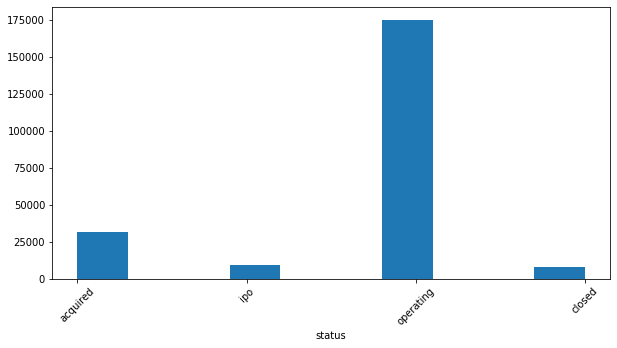

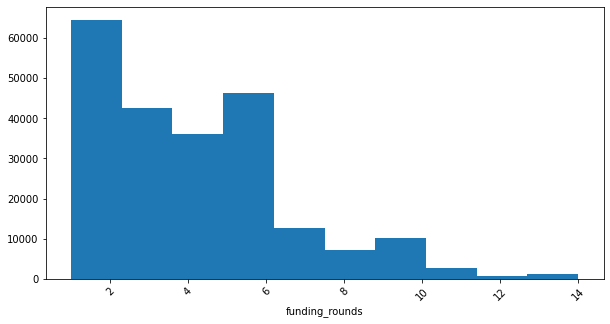

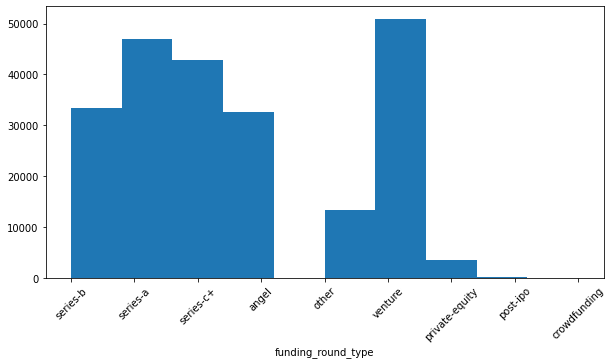

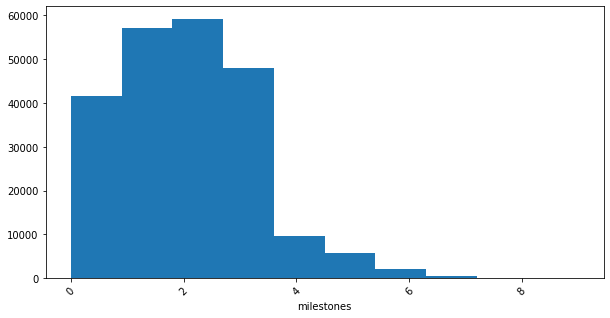

In [ ]:
for col in ['status', 'funding_rounds', 'funding_round_type', 'milestones']:
  if(len(pd.unique(df2[col]))>20):
    plt.figure(figsize=(12,6))
    plt.hist(df2[col], bins=len(pd.unique(df2[col])))
    plt.xticks(rotation=90)
  else :
    plt.figure(figsize=(10,5))
    plt.hist(df2[col])
    plt.xticks(rotation=45)
    
  plt.xlabel(col)
  plt.show()

In [ ]:
df2 = df2[~(df2['country_code'].isnull() | df2['description'].isnull() | df2['funded_at'].isnull() | df2['founded_at'].isnull() | df2['category_code'].isnull())]

In [ ]:
df2.isna().sum()

id                    0
funding_round_id      0
funded_object_id      0
investor_object_id    0
entity_type           0
name                  0
permalink             0
category_code         0
status                0
founded_at            0
description           0
country_code          0
first_funding_at      0
last_funding_at       0
funding_rounds        0
funding_total_usd     0
milestones            0
funded_at             0
funding_round_type    0
raised_amount_usd     0
dtype: int64

In [ ]:
df2=df2.drop_duplicates()
sum(df2.duplicated())

0

Our working dataset is ready with some facts about data already known due to EDA 

# Some Descriptive Analysis

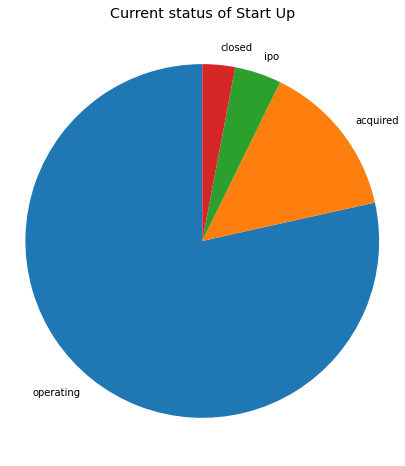

In [ ]:
plt.rcParams['figure.figsize'] = 7,8
labels = df2['status'].value_counts().index.tolist()
sizes = df2['status'].value_counts().tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, startangle=90)
ax1.axis('equal')
plt.title("Current status of Start Up", size = 'x-large')

plt.show()

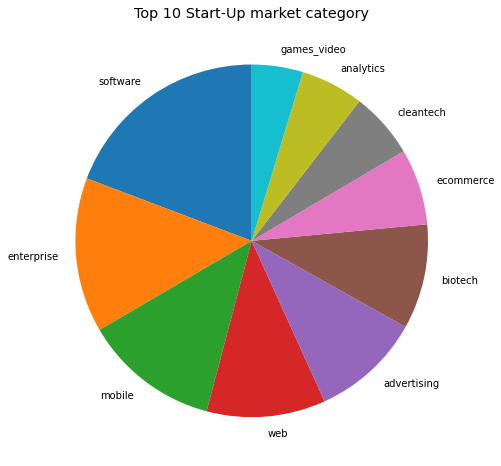

In [ ]:
plt.rcParams['figure.figsize'] = 7,8
labels = df2['category_code'].value_counts()[:10].index.tolist()
sizes = df2['category_code'].value_counts()[:10].tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, startangle=90)
ax1.axis('equal')
plt.title("Top 10 Start-Up market category", size = 'x-large')

plt.show()

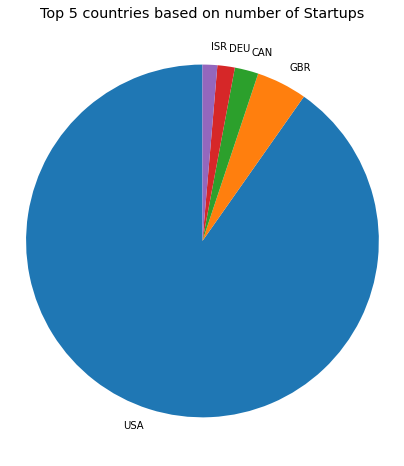

In [ ]:
plt.rcParams['figure.figsize'] = 7,8
labels = df2['country_code'].value_counts()[:5].index.tolist()
sizes = df2['country_code'].value_counts()[:5].tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, startangle=90)
ax1.axis('equal')
plt.title("Top 5 countries based on number of Startups", size = 'x-large')

plt.show()

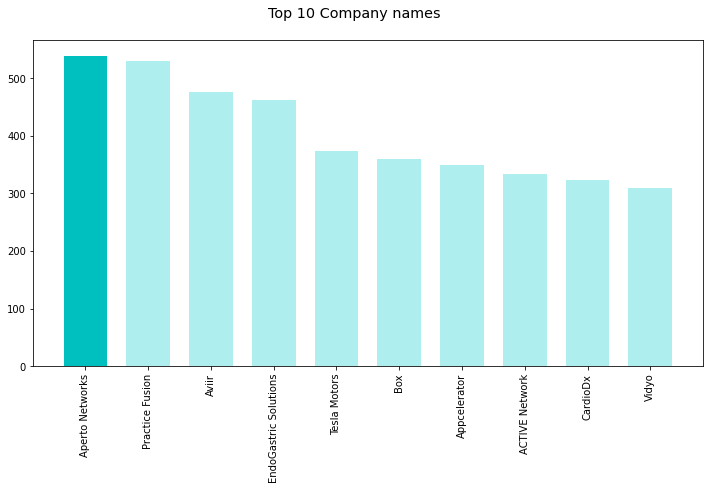

In [ ]:
plt.rcParams['figure.figsize'] = 12,6

height = df2['name'].value_counts()[:10].tolist()
bars =  df2['name'].value_counts()[:10].index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= ['c']+['paleturquoise']*14)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.title("Top 10 Company names", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [ ]:
df2['count'] = 1
country_market = df2[['count','country_code','category_code']].groupby(['country_code','category_code']).agg({'count': 'sum'})
country_market_pct = country_market.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
country_market_pct.reset_index(inplace = True)

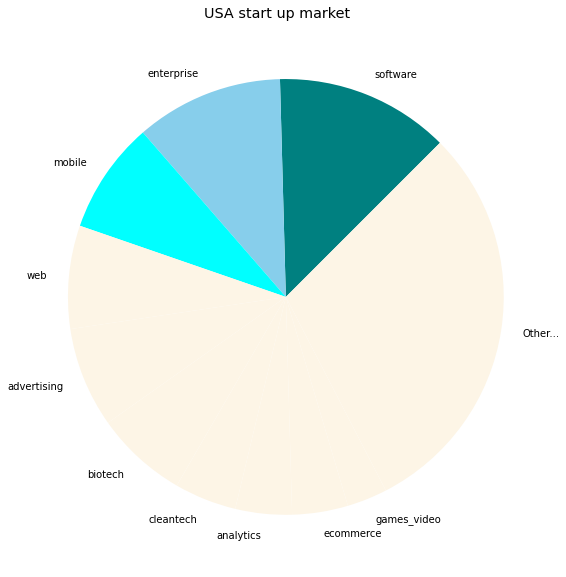

In [ ]:
USA_market_pct = country_market_pct[country_market_pct['country_code'] == "USA"]
USA_market_pct = USA_market_pct.sort_values('count',ascending = False)[0:10]

plt.rcParams['figure.figsize'] =8,8
labels = list(USA_market_pct['category_code'])+['Other...']
sizes = list(USA_market_pct['count'])+[100-USA_market_pct['count'].sum()]
colors =   ['teal', 'skyblue','aqua'] +['oldlace']*8

plt.pie(sizes, colors = colors ,labels=labels, startangle=45)
plt.axis('equal')
plt.tight_layout()
plt.title("USA start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()

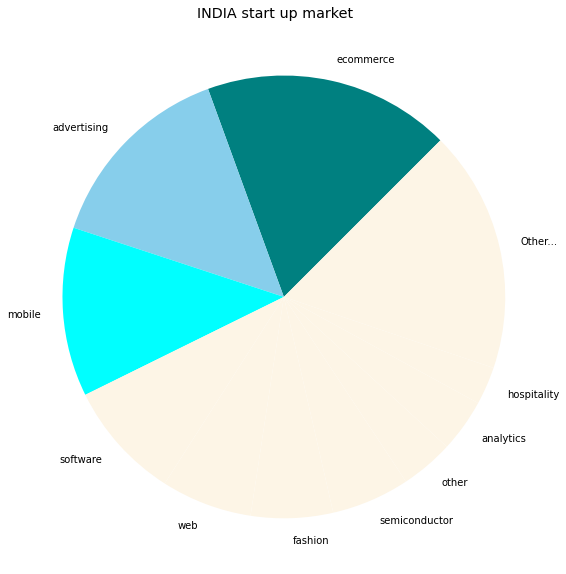

In [ ]:
IND_market_pct = country_market_pct[country_market_pct['country_code'] == "IND"]
IND_market_pct = IND_market_pct.sort_values('count',ascending = False)[0:10]

plt.rcParams['figure.figsize'] = 8,8
labels = list(IND_market_pct['category_code'])+['Other...']
sizes = list(IND_market_pct['count'])+[100-IND_market_pct['count'].sum()]
colors =  ['teal', 'skyblue','aqua'] +['oldlace']*8

plt.pie(sizes, colors = colors ,labels=labels, startangle=45)
plt.axis('equal')
plt.tight_layout()
plt.title("INDIA start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')
plt.show()

# Some Predictive Analysis

In [ ]:
df2.to_csv('processed.csv', index=False, header=1)
df3 = pd.read_csv("./processed.csv", low_memory=False, parse_dates=["funded_at"])
df3.head()

,id,funding_round_id,funded_object_id,investor_object_id,entity_type,name,permalink,category_code,status,founded_at,description,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,milestones,funded_at,funding_round_type,raised_amount_usd,count
0,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2006-12-01,series-b,8500000.0,1
1,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2005-10-01,series-a,2800000.0,1
2,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2008-09-24,series-c+,28700000.0,1
3,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2011-07-12,series-c+,5000000.0,1
4,2,1,c:4,f:2,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2006-12-01,series-b,8500000.0,1


In [ ]:
for col in df3.columns.values:
  list_vals = pd.unique(df3[col])
  print(col + ' is of type ' + str(df3[col].dtypes) + ', has ' + str(len(list_vals)) + ' unique values')
  if len(list_vals) < 10:
    list_str = ''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print('  These are: '+list_str[0:len(list_str)-2])
  print('\n')

id is of type int64, has 52138 unique values


funding_round_id is of type int64, has 19964 unique values


funded_object_id is of type object, has 11368 unique values


investor_object_id is of type object, has 12663 unique values


entity_type is of type object, has 1 unique values
  These are: Company


name is of type object, has 11368 unique values


permalink is of type object, has 11368 unique values


category_code is of type object, has 42 unique values


status is of type object, has 4 unique values
  These are: acquired, ipo, operating, closed


founded_at is of type object, has 1633 unique values


description is of type object, has 10890 unique values


country_code is of type object, has 94 unique values


first_funding_at is of type object, has 2638 unique values


last_funding_at is of type object, has 2265 unique values


funding_rounds is of type int64, has 14 unique values


funding_total_usd is of type float64, has 4096 unique values


milestones is of type int64, h

In [ ]:
df3.head()

,id,funding_round_id,funded_object_id,investor_object_id,entity_type,name,permalink,category_code,status,founded_at,description,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,milestones,funded_at,funding_round_type,raised_amount_usd,count
0,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2006-12-01,series-b,8500000.0,1
1,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2005-10-01,series-a,2800000.0,1
2,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2008-09-24,series-c+,28700000.0,1
3,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2011-07-12,series-c+,5000000.0,1
4,2,1,c:4,f:2,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2006-12-01,series-b,8500000.0,1


--
Preparing another dataframe to carry out Regression
--

In [ ]:
df3["saleYear"] = df3.funded_at.dt.year
df3["saleMonth"] = df3.funded_at.dt.month
df3["saleDay"] = df3.funded_at.dt.day
df3["saleDayOfWeek"] = df3.funded_at.dt.dayofweek

In [ ]:
df3['funding_till_date'] = df3['funding_total_usd'] - df3['raised_amount_usd']

In [ ]:
df4 = df3[[ 'id', 'funding_round_id', 'investor_object_id', 'category_code', 'status', 'country_code', 'funded_object_id', 'funding_rounds', 'milestones', 'funding_round_type', 'funding_till_date', 'saleYear', 'saleMonth', 'saleDay', 'saleDayOfWeek', 'raised_amount_usd' ]]
df5 = df4.copy()

In [ ]:
for label, content in df5.items():
    if pd.api.types.is_string_dtype(content):
        df5[label] = content.astype("category").cat.as_ordered()

In [ ]:
for label, content in df5.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df5[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df5[label] = pd.Categorical(content).codes+1

In [ ]:
df5.head()

,id,funding_round_id,investor_object_id,category_code,status,country_code,funded_object_id,funding_rounds,milestones,funding_round_type,funding_till_date,saleYear,saleMonth,saleDay,saleDayOfWeek,raised_amount_usd,investor_object_id_is_missing,category_code_is_missing,status_is_missing,country_code_is_missing,funded_object_id_is_missing,funding_round_type_is_missing
0,1,1,1889,27,1,91,7433,4,8,7,36500000.0,2006,12,1,4,8500000.0,False,False,False,False,False,False
1,1,1,1889,27,1,91,7433,4,8,6,42200000.0,2005,10,1,5,2800000.0,False,False,False,False,False,False
2,1,1,1889,27,1,91,7433,4,8,8,16300000.0,2008,9,24,2,28700000.0,False,False,False,False,False,False
3,1,1,1889,27,1,91,7433,4,8,8,40000000.0,2011,7,12,1,5000000.0,False,False,False,False,False,False
4,2,1,3478,27,1,91,7433,4,8,7,36500000.0,2006,12,1,4,8500000.0,False,False,False,False,False,False


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162966 entries, 0 to 162965
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id                             162966 non-null  int64  
 1   funding_round_id               162966 non-null  int64  
 2   investor_object_id             162966 non-null  int16  
 3   category_code                  162966 non-null  int8   
 4   status                         162966 non-null  int8   
 5   country_code                   162966 non-null  int8   
 6   funded_object_id               162966 non-null  int16  
 7   funding_rounds                 162966 non-null  int64  
 8   milestones                     162966 non-null  int64  
 9   funding_round_type             162966 non-null  int8   
 10  funding_till_date              162966 non-null  float64
 11  saleYear                       162966 non-null  int64  
 12  saleMonth                     

In [ ]:
X = df5.drop(columns = ['raised_amount_usd', 'saleYear'])
Y = df3[["raised_amount_usd"]]
print(X.shape,Y.shape)

(162966, 20) (162966, 1)


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.15)

In [ ]:
x = X_train.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train = pd.DataFrame(x_scaled)

x = X_test.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_test = pd.DataFrame(x_scaled)

In [ ]:
RF = RandomForestRegressor()
RF.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
print('Test MAE error is', mean_absolute_error(Y_test, RF.predict(X_test)))
print('Test r2 score is', RF.score(X_test, Y_test))
print('Train r2 score is', RF.score(X_train, Y_train))

Test MAE error is 689481.8446346902
Test r2 score is 0.9910657746843431
Train r2 score is 0.9977623877776385
